### Boosting with AdaBoostRegressor and Ridge base estimator

In [453]:
import importlib
import helper_functions
import pandas as pd
importlib.reload(helper_functions)
from helper_functions import *
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.pipeline import Pipeline, FeatureUnion, _transform_one
from sklearn.externals.joblib import Parallel, delayed
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV     

In [447]:
# Defining transformation pipeline as in other examples
trans_pipeline = Pipeline([
    ('impute_numerical', DFTransform(lambda X: fill_numerical_nans(X))),
    ('impute_categorical', DFTransform(lambda X: impute_categorical(X))),
    ('impute_special_cases', DFTransform(lambda X: impute_special_cases(X))),
    # Normalization of highly skewed features added
    ('normalize_skewed_features', DFTransform(lambda X: normalize_skewed_features(X))),
    ('encode_dummies', DFTransform(lambda X: create_dummies(X))),
    ('check_nans', DFTransform(lambda X: check_nans(X))),
    ('create_sellingage', DFTransform(lambda X: create_sellingage(X))),
    ('combined_livingspace', DFTransform(lambda X: combined_livingspace(X)))
])

In [448]:
# Define bossting regressor with rige as base estimator
boosting_estimator = Pipeline(memory=None,
     steps=[('ada_boost', AdaBoostRegressor(base_estimator=Ridge(alpha=10, fit_intercept=True, max_iter=None,
   normalize=False, random_state=42, solver='cholesky'),
         learning_rate=0.0001, loss='square', n_estimators=500, random_state=42))])

In [449]:
(trans_p, fit_p, X_transformed) = train_pipeline(trans_pipeline, boosting_estimator, show_plot=False)

Loading training data...
Transforming input...
Creating dummies...
Starting with input of shape: (2915, 79)
Returning output of shape: (2915, 289)
Create train/test split
Create predictions...(train)
R2-score: 0.947357919642
RMSE (log): 0.09066817677385705
Create predictions...(test)
R2-score: 0.908701891744
RMSE (log): 0.11943078428766919
Fitting the pipeline to all the data...
Score: 0.94074438


Mean of Salesprice in Training-Data: 180921.20
Mean of Salesprice in predictions: 178873.85
Difference in means is: -2047.342969


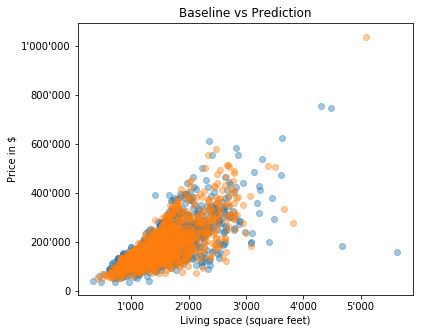

In [454]:
predictions = execute_pipeline(trans_p, fit_p, X_transformed)

In [451]:
write_submission(predictions, False)

File written to C:\Source\predicting-house-prices\submissions\20180823102000.csv


Kaggle score: 0.11844